In [8]:
import pandas as pd
data = pd.read_csv("../data/pima-indians-diabetes.txt", header=None)
data.columns = ['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'BMI', 'pedigree', 'age', 'label']

<AxesSubplot:>

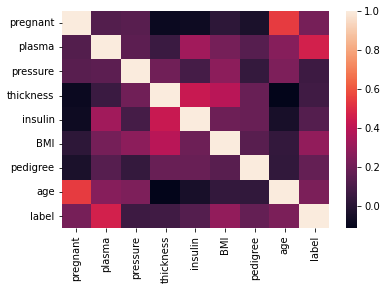

In [9]:
corr = data.corr()
# visualize correlation matrix
import seaborn as sns
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [10]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
#print number of values in class variable
print(y_train.value_counts())

0    350
1    187
Name: label, dtype: int64


In [14]:
# Oversample the 1 class in train data
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

In [15]:
from xgboost import XGBClassifier
# train xgboost with 20 iterations and 0.1 learning rate
model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=20, silent=True, objective='binary:logistic')
model.fit(X_train_res, y_train_res)

[21:12:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [16]:
for i in range(len(model.feature_importances_)):
    print(model.feature_importances_[i], X.columns[i])

0.07435598 pregnant
0.34544855 plasma
0.021254763 pressure
0.07815848 thickness
0.054661375 insulin
0.16645756 BMI
0.07752644 pedigree
0.1821368 age


In [17]:
from sklearn.metrics import accuracy_score, recall_score
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(recall_score(y_test, predictions))

0.7316017316017316
0.7901234567901234
